<a href="https://colab.research.google.com/github/Adriana0015/iayaa-Equipo-15/blob/main/Redneuronal_Equipo15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 7**
###**Actividad 8. Práctica: red neuronal artificial.**

**Nombres y matrículas de los integrantes del equipo:**
* Adriana Fernanda Jimenez Avalos - A01087695
* Vladimir Salazar Altamirano - A01793118
* Pablo Alejandro Colunga Vázquez - A01793671  
* Julián Valera Juárez - A01793875
* Luis Daniel Rivera Salinas - A01374997


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas.
El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”,“Lifetime People who have liked a Page and engaged with a post” y “Likes”. 


In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.core.arrays import categorical # agregar class pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False, copy=True)
from sklearn.pipeline import Pipeline #agregar para ejercicio 3a
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import requests, zipfile, io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, RepeatedKFold
import matplotlib.pyplot as plt

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import QuantileTransformer

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
file_name = 'dataset_Facebook.csv'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
df = pd.read_csv(file_name, sep=';')
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


#Ejercicio 1.-
En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las
mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables
que indican los autores en la Tabla 3 del artículo citado. 

In [ ]:
df2 = df[['Page total likes','Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid','Lifetime People who have liked your Page and engaged with your post']].copy()
df2 = df2.rename(columns={'Lifetime People who have liked your Page and engaged with your post':'LPE'})
df2



,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,Photo,2,12,4,3,0.0,119
1,139441,Status,2,12,3,10,0.0,1108
2,139441,Photo,3,12,3,3,0.0,132
3,139441,Photo,2,12,2,10,1.0,1386
4,139441,Photo,2,12,2,3,0.0,396
...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,392
496,81370,Photo,2,1,5,8,0.0,301
497,81370,Photo,1,1,5,2,0.0,363
498,81370,Photo,3,1,4,11,0.0,370


In [ ]:
df2.dtypes

Page total likes      int64
Type                 object
Category              int64
Post Month            int64
Post Weekday          int64
Post Hour             int64
Paid                float64
LPE                   int64
dtype: object

In [ ]:
#identificar estos valores a traves de metodo isna
df2.isna().any()

Page total likes    False
Type                False
Category            False
Post Month          False
Post Weekday        False
Post Hour           False
Paid                 True
LPE                 False
dtype: bool

In [ ]:
#Valores fuera de rango en Genero
df2['Paid'].value_counts()

0.0    360
1.0    139
Name: Paid, dtype: int64

In [ ]:
#borrando los valores nulos (1 renglon en paid)
df2 = df2.dropna()
df2



,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,Photo,2,12,4,3,0.0,119
1,139441,Status,2,12,3,10,0.0,1108
2,139441,Photo,3,12,3,3,0.0,132
3,139441,Photo,2,12,2,10,1.0,1386
4,139441,Photo,2,12,2,3,0.0,396
...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,422
495,85093,Photo,3,1,7,2,0.0,392
496,81370,Photo,2,1,5,8,0.0,301
497,81370,Photo,1,1,5,2,0.0,363


In [ ]:
#Convertir String a numerico, columna Type
df2.loc[ df2["Type"] == "Photo", "Type"] = 0
df2.loc[ df2["Type"] == "Status", "Type"] = 1
df2.loc[ df2["Type"] == "Link", "Type"] = 2
df2.loc[ df2["Type"] == "Video", "Type"] = 3

df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,0,2,12,4,3,0.0,119
1,139441,1,2,12,3,10,0.0,1108
2,139441,0,3,12,3,3,0.0,132
3,139441,0,2,12,2,10,1.0,1386
4,139441,0,2,12,2,3,0.0,396
...,...,...,...,...,...,...,...,...
494,85093,0,3,1,7,10,0.0,422
495,85093,0,3,1,7,2,0.0,392
496,81370,0,2,1,5,8,0.0,301
497,81370,0,1,1,5,2,0.0,363


#Ejercicio 2.-
 Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación. 

In [ ]:
y = df2['LPE']
X = df2.drop('LPE', axis = 1)

In [ ]:
#divide set de datos para prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)
print(X_train.shape, X_test.shape)

(399, 7) (100, 7)


#Ejercicio 3.-
Definirás tus propias funciones de errores para este problema de regresión. Los errores que
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el
error porcentual absoluto medio MAPE. 


In [ ]:
def MAPE(real, pred):

  train, y_pred = np.array(real), np.array(pred)
  mape = np.mean(np.abs((real - pred) / real)) * 100
  return mape

In [ ]:
def MAE(real, pred):
    
  train, test = np.array(real), np.array(pred)
  mae = np.mean(np.abs(real - pred))
  return mae

In [ ]:
def RMSE(real, pred):
    
  real, pred = np.array(real), np.array(pred)
  rmse= np.sqrt((((pred) - real) ** 2).mean())
  return rmse

#Ejercicio 4.-
En la página de la UCI, así como en el artículo de los autores previamente citado encuentras
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida.
Utiliza un Pipeline para evitar el filtrado de información. 


In [ ]:
df_cat = ['Category', 'Type']
df_num = ['Page total likes'] #Aqui recordar no poner LPE porque es la salida
df_ord = ['Post Month', 'Post Hour','Post Weekday']
df_bin = ['Paid']

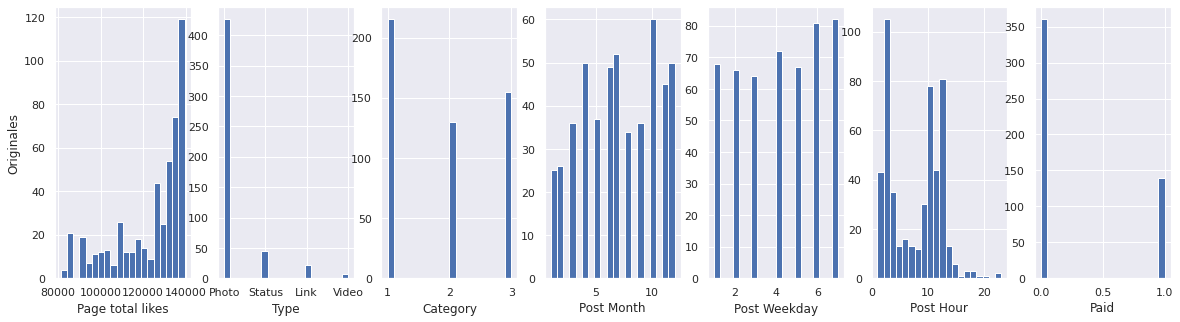

In [ ]:
#analizar comportamiento para confirmar clasificación
mis_variables = ['Page total likes','Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid']

sns.set(rc = {'figure.figsize':(20, 5)})
fig, axes = plt.subplots(1, 7)

for k in range(0,7): 
  plt.subplot(1, 7, k+1)
  Transf0 = df[mis_variables[k]]
  plt.hist(Transf0, bins=20)

  plt.xlabel(mis_variables[k])
  if k == 0:
    plt.ylabel('Originales')


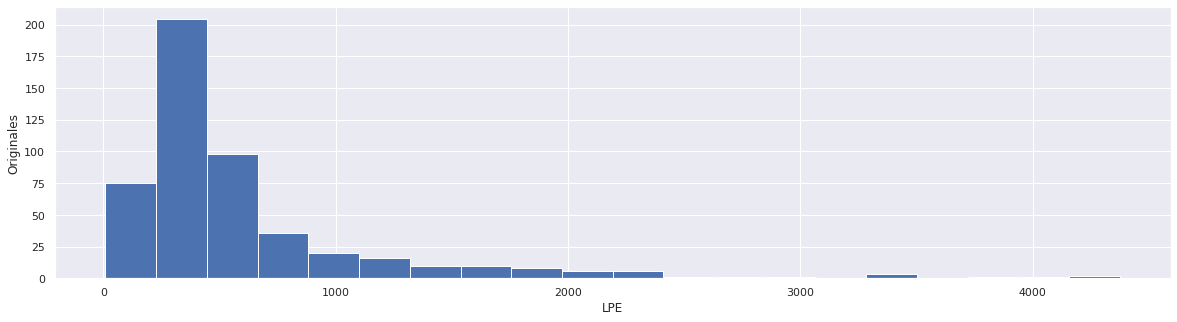

In [ ]:
#analizar comportamiento para confirmar clasificación
mis_variables = ['LPE']

sns.set(rc = {'figure.figsize':(20, 5)})
fig, axes = plt.subplots(1, 1) 

for k in range(0,1): 
  plt.subplot(1, 1, k+1)
  Transf0 = df2[mis_variables[k]]
  plt.hist(Transf0, bins=20)

  plt.xlabel(mis_variables[k])
  if k == 0:
    plt.ylabel('Originales')

In [ ]:
# Escalando las variables cuantitativas a un rango equiparable
pipelineNum = Pipeline(steps = [('imputacionNumerica', SimpleImputer(strategy='median')),('log', FunctionTransformer(np.log))])
columnasNum = df_num

# Aplicando One-Hot
pipelineCategoricas = Pipeline(steps = [('imputacionCategorica', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columnasCategoricas = df_cat

pipelineBinarias = Pipeline(steps = [('imputacionBinaria', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columnasBinarias = df_bin

columnasTransformer = ColumnTransformer(transformers = [('numerical', pipelineNum, columnasNum),
                                                        ('categorical', pipelineCategoricas, columnasCategoricas),
                                                        ('binaries', pipelineBinarias, columnasBinarias),
                                                        ], remainder='passthrough')

#Ejercicio 5.-
Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la
actividad.

In [ ]:
#Particionar el set de datos entre 100 de validacion y 300 para entrenamiento
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, train_size = 0.75, test_size = 0.25, random_state=1)

print("Datos para el entrenamiento  : " + str( X_train2.shape ))
print("Datos para la prueba         : " + str( X_val.shape ))

Datos para el entrenamiento  : (299, 7)
Datos para la prueba         : (100, 7)


In [ ]:
#Modelo Dummy Train
modeloDummyT = DummyRegressor(strategy='mean')
modeloDummyT.fit(X_train2, y_train2)
yhat_t = modeloDummyT.predict(X_train2).ravel()

#modelo Dummy validacion
modeloDummyV = DummyRegressor(strategy='mean')
modeloDummyV.fit(X_val, y_val)
yhat_v = modeloDummyV.predict(X_val).ravel()

#Aplicando funcion de errores
Dummy_RMSE_T = RMSE(y_train2.values,yhat_t)
Dummy_MAE_T = MAE(y_train2.values,yhat_t)
Dummy_MAPE_T = MAPE(y_train2.values,yhat_t)

Dummy_RMSE_V = RMSE(y_val.values,yhat_v)
Dummy_MAE_V = MAE(y_val.values,yhat_v)
Dummy_MAPE_V = MAPE(y_val.values,yhat_v)

#imprime Resultados
print('Dummy RMSE Test:', Dummy_RMSE_T)
print('Dummy MAE Test:',Dummy_MAE_T)
print('Dummy MAPE Test:',Dummy_MAPE_T)
print('Dummy RMSE Validacion:', Dummy_RMSE_V)
print('Dummy MAE Validacion:',Dummy_MAE_V)
print('Dummy MAPE Validacion:',Dummy_MAPE_V)

Dummy RMSE Test: 585.5283900684169
Dummy MAE Test: 390.77430901220345
Dummy MAPE Test: 129.12797817837875
Dummy RMSE Validacion: 620.6132234330815
Dummy MAE Validacion: 354.3228
Dummy MAPE Validacion: 128.23492123413777


#Ejercicio 6.- 
Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de
iteraciones para que todos los modelos converjan.

In [ ]:
from sklearn.linear_model import LinearRegression #SE CAMBIÓ A REGRESIÓN LINEAL
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

def get_modelos():
    modelos = list()
    nombres = list()

   # LR - Regresión Logística: #SE PROPONE ELIMINAR, SE CAMBIÓ A REGRESIÓN LINEAL
   # LR - Regresión Lineal:
    #modelos.append(LogisticRegression(solver='liblinear')) #SE CAMBIÓ A REGRESIÓN LINEAL
    modelos.append(LinearRegression())
    nombres.append('LR')
    
    # Bosque aleatorio
    modelos.append(RandomForestRegressor())
    nombres.append('Bosque aleatorio')

   # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
#    modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
#    nombres.append('MLP')
    
    # Perceptron Multicapa
    modelos.append(MLPRegressor(max_iter = 20000))
    nombres.append('Perceptron multicapa')
                   
    return modelos, nombres

In [ ]:
modelos, nombres = get_modelos()
resultadosCVTrain = list()
resultadosCVTest = list()
resultadoMAPETrain = list()
resultadoMAPETest = list()

# Apagando los warnings, ya que hay variables que se les aplica OneHot que no aparecen en el set de validación
warnings.filterwarnings("ignore")

mismetricas = {'RMSE':make_scorer(RMSE), 'MAE':make_scorer(MAE), 'MAPE':make_scorer(MAPE)}

print( "Validación cruzada para datos de entrenamiento" )
for i in range(len(modelos)):
    cv = RepeatedStratifiedKFold( n_splits=3, n_repeats=5, random_state=10 )  
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[i])])
    resultadosCVTrain = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv= cv, return_train_score=True)

    print('%s:\nRMSE: %.3f (%.4f)\nMAE: %.3f (%.4f)\nMAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTrain['train_RMSE']),
                                                                            np.std(resultadosCVTrain['train_RMSE']),
                                                                            np.mean(resultadosCVTrain['train_MAE']),
                                                                            np.std(resultadosCVTrain['train_MAE']),                                                                           
                                                                            np.mean(resultadosCVTrain['train_MAPE']),
                                                                            np.std(resultadosCVTrain['train_MAPE'])
                                                                            ))

    print('%s:\nRMSE: %.3f (%.4f)\nMAE: %.3f (%.4f)\nMAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTrain['test_RMSE']),
                                                                            np.std(resultadosCVTrain['test_RMSE']),
                                                                            np.mean(resultadosCVTrain['test_MAE']),
                                                                            np.std(resultadosCVTrain['test_MAE']),                                                                           
                                                                            np.mean(resultadosCVTrain['test_MAPE']),
                                                                            np.std(resultadosCVTrain['test_MAPE'])
                                                                            ))

    resultadoMAPETrain.append(resultadosCVTrain['train_MAPE'])  
    resultadoMAPETest.append(resultadosCVTrain['test_MAPE'])
     

Validación cruzada para datos de entrenamiento
LR:
RMSE: 474.830 (34.4615)
MAE: 285.309 (16.6276)
MAPE: 92.532 (2.7114)

LR:
RMSE: 492.572 (66.7504)
MAE: 301.144 (18.1976)
MAPE: 95.855 (7.4249)

Bosque aleatorio:
RMSE: 206.251 (19.8695)
MAE: 124.900 (10.3528)
MAPE: 38.300 (2.3488)

Bosque aleatorio:
RMSE: 555.719 (77.5619)
MAE: 337.485 (33.6006)
MAPE: 108.821 (8.0795)

Perceptron multicapa:
RMSE: 477.760 (36.4300)
MAE: 295.015 (22.3604)
MAPE: 93.237 (6.4659)

Perceptron multicapa:
RMSE: 504.642 (57.9905)
MAE: 316.769 (14.0476)
MAPE: 98.945 (10.4590)



**CONCLUSIONES:**

Al observar los valores que arrojan los modelos con los datos de entrenamiento y datos de prueba, se observa lo siguiente:

**Modelo de regresión lineal**. Se identifica que este modelo está sobre-entrenado, ya que hay una diferencia relativamente grande entre el error de entrenamiento y el error de prueba.

**Modelo de Bosque Aleatorio**. Se considera que también está muy sobre-entrenado, ya que el error de entrenamiento es mucho menor que el error de prueba.

**Modelo Perceptrón**. Se identifica que este modelo no está sobre-entrenado, ya que hay una diferencia relativamente pequeña entre el error de entrenamiento y el error de prueba.

#Ejercicio 7.- 
Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

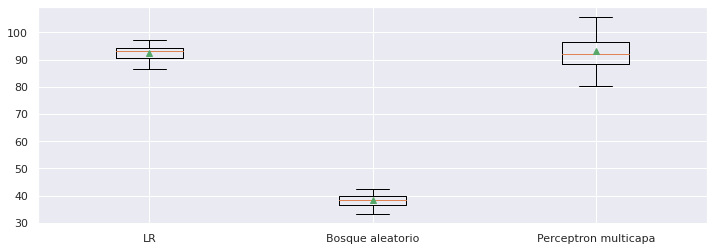

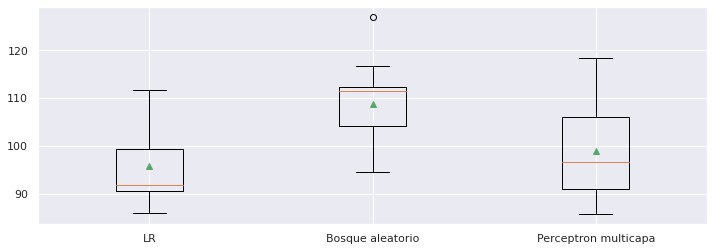

In [ ]:
sns.set( rc={"figure.figsize": (12, 4)} )



# Imprimiendo la métrica recall en diagrama de caja - Datos de entrenamiento
plt.boxplot(resultadoMAPETrain, labels=nombres, showmeans=True)
plt.show()



# Imprimiendo la métrica recall en diagrama de caja - Datos de validación
plt.boxplot(resultadoMAPETest, labels=nombres, showmeans=True)
plt.show()

**CONCLUSIONES:**

**Se osberva que los autores alcanzaron una mejor métrica de MAPE, alcanzando 26.9%. En contraste, los mejores resultados obtenidos respecto al MAPE, se obtuvieron con el modelo de regresión lineal para el conjunto de prueba.**

**Entre más angosta la caja es que los valores no variaron tanto, entre más grande la caja es que los valores tienen mayor varianza.**

**El bosque aleatorio está muy sobre-entrenado.
La red neuronal no experimenta sobre-entrenamiento pero tiene menor rendimiento. También tiene valores atípicos, que no son deseables para este experimento.**

#Ejercicio 8.- 
Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [ ]:

#obtener modelos y parámetros
modeloMLP_iter = MLPRegressor(max_iter=10000)
cvLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [{'hidden_layer_sizes': [(5,5),(7,7),(9,9),(11,11),(13,13),(15,15),(17,17),(19,19)],
              'alpha':[0.0001, 0.001, 0.005, 0.05 ],
              'learning_rate_init': [0.001, 0.005, 0.01]
              }]

grid = GridSearchCV(estimator=modeloMLP_iter,
                    param_grid=dicc_grid,
                    cv=cvLR,
                    #scoring=maker
                    scoring = 'neg_mean_absolute_percentage_error',
                    error_score='raise'                    
                    )


In [ ]:
#X y Y transformados previamente
grid.fit(X_train, np.ravel(y_train))

print('Mejor valor de MAPE obtenido con la mejor combinacion:', grid.best_score_)
print('Mejor combinacion de valores con hyperparametros:', grid.best_params_)
print('Métrica utilizando: ', grid.scoring)

Mejor valor de MAPE obtenido con la mejor combinacion: -1.1709164830227576
Mejor combinacion de valores con hyperparametros: {'alpha': 0.005, 'hidden_layer_sizes': (13, 13), 'learning_rate_init': 0.01}
Métrica utilizando:  neg_mean_absolute_percentage_error


# Ejercicio 9.- 

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

Feature: 0, Score: 0.00316
Feature: 1, Score: 0.00004
Feature: 2, Score: -0.00001
Feature: 3, Score: -0.00017
Feature: 4, Score: 0.00004
Feature: 5, Score: -0.00016
Feature: 6, Score: -0.00004


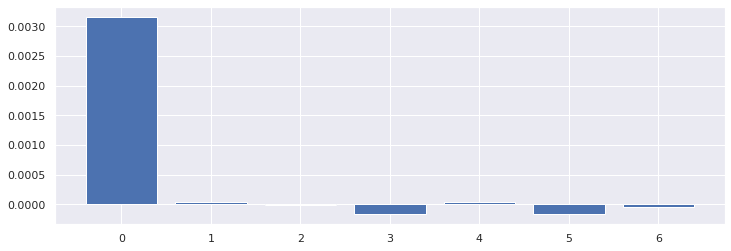

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
from sklearn.inspection import permutation_importance
modelo_MLP = MLPRegressor(hidden_layer_sizes=(5,5), 
                            max_iter=20000, 
                            alpha=0.005,
                            learning_rate_init=0.001)  

modelo_MLP.fit(X_train, y_train)

importance = permutation_importance(modelo_MLP, X_train, y_train, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

Las características que tienen mayor importancia en el modelo, es la 0, 3 y 5.
Las carcaterísticas son ls siguientes: 
0:'Page total likes'
1:'Type'
3:'Category'
4:'Post Month'
5:'Post Weekday'
6:'Post Hour', 'Paid'.

Se observa que la carcaterística 'Page total likes' es por mucho la más importante de todas para predecir la variable LPE, es la variable que más provee información.

Casi que para este ejercicio se podrían eliminar estas caracetísticas que no aportan información al modelo, y se podrían obtener resultados similares.

# Ejercicio 10.-

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
#datos de prueba o etto

#obtener modelos y parámetros
modelo_RF = RandomForestRegressor()

cvLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [{
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
              }]

grid_RF = GridSearchCV(estimator=modelo_RF,
                    param_grid=dicc_grid,
                    cv=cvLR,
                    #scoring=maker
                    scoring = 'neg_mean_absolute_percentage_error',
                    error_score='raise'                    
                    )

In [ ]:
#X y Y transformados previamente
grid_RF.fit(X_test, np.ravel(y_test))


print('Mejor valor de MAPE obtenido con la mejor combinacion:', grid_RF.best_score_)
print('Mejor combinacion de valores con hyperparametros:', grid_RF.best_params_)
print('Métrica utilizando: ', grid_RF.scoring)

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
from sklearn.inspection import permutation_importance

modelo_RF.fit(X_test, y_test)

importance_RF = permutation_importance(modelo_RF, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_RF['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance_RF['importances_mean']))], importance_RF['importances_mean'])
plt.show()

**Conclusiones:**
Está sobre-entrenado pero tiene relación con el feature importance del artículo.

# Ejercicio 11.-

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [ ]:
from sklearn.linear_model import LinearRegression

#obtener modelos y parámetros

modelo_LR = LinearRegression()
cvLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [{'fit_intercept':[True,False],'normalize':[True,False]}]

grid_LR = GridSearchCV(estimator=modelo_LR,
                    param_grid=dicc_grid,
                    cv=cvLR,
                    #scoring=maker
                    scoring = 'neg_mean_absolute_percentage_error',
                    error_score='raise'                    
                    )

In [ ]:
#X y Y transformados previamente
grid_LR.fit(X_test, np.ravel(y_test))

print('Mejor valor de MAPE obtenido con la mejor combinacion:', grid_LR.best_score_)
print('Mejor combinacion de valores con hyperparametros:', grid_LR.best_params_)
print('Métrica utilizando: ', grid_LR.scoring)

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
from sklearn.inspection import permutation_importance

modelo_LR.fit(X_test, y_test)

importance = permutation_importance(modelo_LR, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

# Ejercicio 12.-

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

**CONCLUSIONES FINALES:**

Las características son las siguientes:
'Page total likes' (0)
'Type' (1)
'Category' (2)
'Post Month'(3)
'Post Weekday' (4)
'Post Hour'(5)
'Paid' (6)

A diferencia de lo obtenido por los autores, la característica que más influye en el modelo es la de "Page total likes", mientras que en el modelo de los autores es "Type".



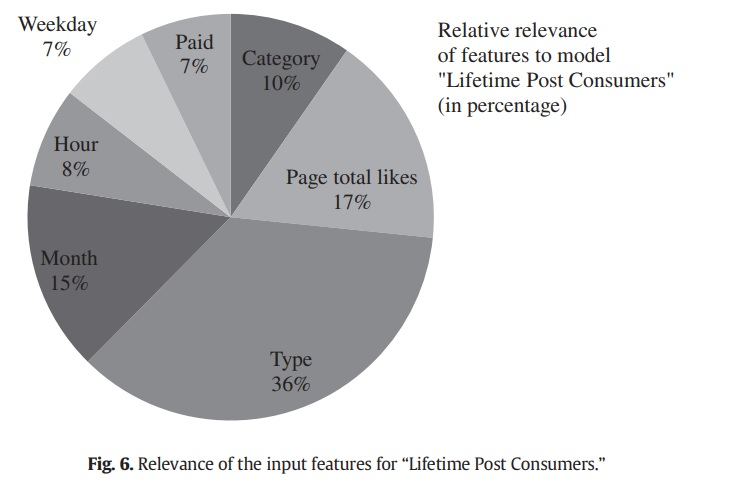

Considerando el desempeño de los modelos sin ajustar los hiperparámetros, se osberva que los autores alcanzaron una mejor métrica de MAPE, alcanzando 26.9%. En contraste, los mejores resultados obtenidos en nuestros modelos respecto al MAPE, se obtuvieron con el modelo de regresión lineal para el conjunto de prueba.

Las características "TYPE" y "PAGE TOTAL LIKES" son relevantes tanto para el modelo de los autores como para nuestros modelos, aunque con diferente ponderación.

NOTA: REVISAR QUÉ ALGORTIMO UTILIZARON LOS AUTORES PARA IDENTIFICAR LA IMPORTANCIA DE LAS CARACTERÍSTICAS